# Figure Refine

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from utilities import mkdir
from utils.viz import heatmap

In [3]:
work_dir = '/data/RaoHiC/results/MISC'
mkdir(work_dir)

### 1. Fig.2C

In [4]:
xticks = list(range(1, 23)) + ['X']
noise = np.random.rand(23) * 0.15
label = ['GM12878'] * 23 + ['GM12878R'] * 23 + ['IMR90'] * 23 + ['K562'] * 23

In [5]:
# range down_prm plus_prm srga_prm down_srm plus_srm srga_srm
gm12878_data = np.loadtxt('/data/RaoHiC/results/GM12878/40kb/visual/ssim/result.csv')
gm12878r_data = np.loadtxt('/data/RaoHiC/results/GM12878R/40kb/visual/ssim/result.csv')
imr90_data = np.loadtxt('/data/RaoHiC/results/IMR90/40kb/visual/ssim/result.csv')
k562_data = np.loadtxt('/data/RaoHiC/results/K562/40kb/visual/ssim/result.csv')

#### SSIM

In [6]:
delta_gm12878  = gm12878_data[:, 2] - gm12878_data[:, 1]
delta_gm12878r = gm12878r_data[:, 2] - gm12878r_data[:, 1]
delta_imr90 = imr90_data[:, 2] - imr90_data[:, 1]
delta_k562  = k562_data[:, 2] - k562_data[:, 1]
delta = np.concatenate((delta_gm12878, delta_gm12878r, delta_imr90, delta_k562))

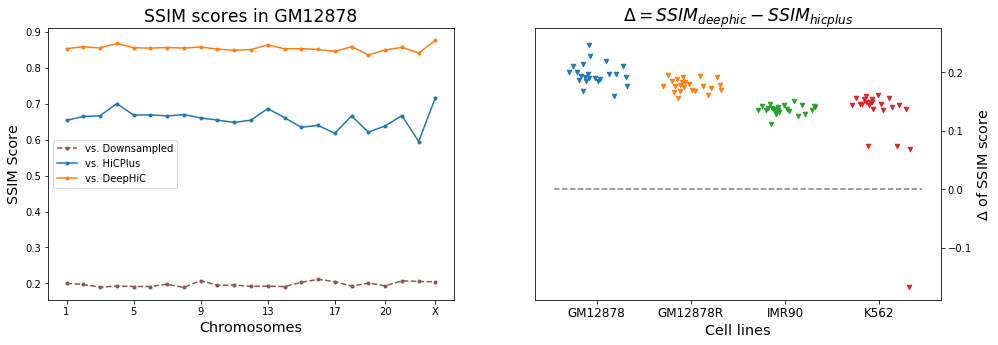

In [7]:
fig = plt.figure(figsize= [16, 5])
ax = fig.add_subplot(1, 2, 1)
ax.plot(xticks, gm12878_data[:, 0], label='vs. Downsampled', marker='.', color='C5', linestyle='--')
ax.plot(xticks, gm12878_data[:, 1], label='vs. HiCPlus', marker='.', color='C0')
ax.plot(xticks, gm12878_data[:, 2], label='vs. DeepHiC', marker='.', color='C1')
ax.set_title('SSIM scores in GM12878', fontsize='xx-large')
ax.set_xticks(['1', '5', '9', '13', '17', '20', 'X'])
ax.set_xlabel('Chromosomes', fontsize='x-large')
ax.set_ylabel('SSIM Score', fontsize='x-large')
ax.legend()
ax = fig.add_subplot(1, 2, 2)
ax.scatter(noise+0.08, delta_gm12878,  s=20, marker='v')
ax.scatter(noise+0.31, delta_gm12878r, s=20, marker='v')
ax.scatter(noise+0.54, delta_imr90,    s=20, marker='v')
ax.scatter(noise+0.77, delta_k562,     s=20, marker='v')
# ax.annotate('chr18', xy=(noise[17]+0.77-0.01, delta_k562[17]+0.01), xytext=(0.7, -0.1), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
ax.plot(np.linspace(0.05,0.95,num=10), np.zeros(10), color='gray', linestyle='--')
ax.set_title('$\Delta = SSIM_{deephic} - SSIM_{hicplus}$', fontsize='xx-large')
ax.set_xticks([0.155, 0.385, 0.615, 0.845])
ax.set_xticklabels(['GM12878', 'GM12878R', 'IMR90', 'K562'], fontsize='large')
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax.set_xlabel('Cell lines', fontsize='x-large')
ax.set_ylabel('$\Delta$ of SSIM score', fontsize='x-large')
svg_file = os.path.join(work_dir, f'fig2c_ssim.svg')
eps_file = os.path.join(work_dir, f'fig2c_ssim.eps')
fig.savefig(svg_file, format='svg')
fig.savefig(eps_file, format='eps')

In [8]:
print(f'Downsampled: {np.mean(gm12878_data[:, 0])}, HiCPlus: {np.mean(gm12878_data[:, 1])}, DeepHiC: {np.mean(gm12878_data[:, 2])}')

Downsampled: 0.19756160869565215, HiCPlus: 0.6574046956521739, DeepHiC: 0.854460956521739


#### PSNR

In [9]:
delta_gm12878  = gm12878_data[:, 5] - gm12878_data[:, 4]
delta_gm12878r = gm12878r_data[:, 5] - gm12878r_data[:, 4]
delta_imr90 = imr90_data[:, 5] - imr90_data[:, 4]
delta_k562  = k562_data[:, 5] - k562_data[:, 4]
delta = np.concatenate((delta_gm12878, delta_gm12878r, delta_imr90, delta_k562))

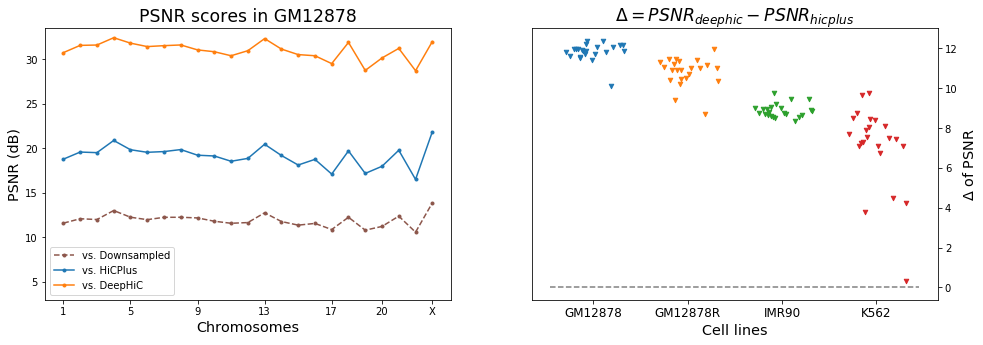

In [10]:
fig = plt.figure(figsize= [16, 5])
ax = fig.add_subplot(1, 2, 1)
ax.plot(xticks, gm12878_data[:, 3], label='vs. Downsampled', marker='.', color='C5', linestyle='--')
ax.plot(xticks, gm12878_data[:, 4], label='vs. HiCPlus', marker='.', color='C0')
ax.plot(xticks, gm12878_data[:, 5], label='vs. DeepHiC', marker='.', color='C1')
ax.set_title('PSNR scores in GM12878', fontsize='xx-large')
ax.set_ylim(bottom=3)
ax.set_xticks(['1', '5', '9', '13', '17', '20', 'X'])
ax.set_title('PSNR scores in GM12878', fontsize='xx-large')
ax.set_xlabel('Chromosomes', fontsize='x-large')
ax.set_ylabel('PSNR (dB)', fontsize='x-large')
ax.legend(loc='lower left')
ax = fig.add_subplot(1, 2, 2)
ax.scatter(noise+0.08, delta_gm12878,  s=20, marker='v')
ax.scatter(noise+0.31, delta_gm12878r, s=20, marker='v')
ax.scatter(noise+0.54, delta_imr90,    s=20, marker='v')
ax.scatter(noise+0.77, delta_k562,     s=20, marker='v')
ax.plot(np.linspace(0.05,0.95,num=10), np.zeros(10), color='gray', linestyle='--')
ax.set_title('$\Delta = PSNR_{deephic} - PSNR_{hicplus}$', fontsize='xx-large')
ax.set_xticks([0.155, 0.385, 0.615, 0.845])
ax.set_xticklabels(['GM12878', 'GM12878R', 'IMR90', 'K562'], fontsize='large')
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax.set_xlabel('Cell lines', fontsize='x-large')
ax.set_ylabel('$\Delta$ of PSNR', fontsize='x-large')
svg_file = os.path.join(work_dir, f'supp_fig_psnr.svg')
eps_file = os.path.join(work_dir, f'supp_fig_psnr.eps')
fig.savefig(svg_file, format='svg')
fig.savefig(eps_file, format='eps')

In [11]:
print(f'Downsampled: {np.mean(gm12878_data[:, 3])}, HiCPlus: {np.mean(gm12878_data[:, 4])}, DeepHiC: {np.mean(gm12878_data[:, 5])}')

Downsampled: 11.92883108695652, HiCPlus: 19.13851282608696, DeepHiC: 30.980467739130432


### 1. Fig.2D

In [12]:
# range down_prm plus_prm srga_prm down_srm plus_srm srga_srm
gm12878_data = np.loadtxt('/data/RaoHiC/results/GM12878/40kb/visual/correlation/data/allchr_mean_result.csv')
gm12878r_data = np.loadtxt('/data/RaoHiC/results/GM12878R/40kb/visual/correlation/data/allchr_mean_result.csv')
imr90_data = np.loadtxt('/data/RaoHiC/results/IMR90/40kb/visual/correlation/data/allchr_mean_result.csv')
k562_data = np.loadtxt('/data/RaoHiC/results/K562/40kb/visual/correlation/data/allchr_mean_result.csv')

#### Pearson

In [13]:
lower, upper = 10, 101
delta_gm12878  = gm12878_data[lower:upper, 3] - gm12878_data[lower:upper, 2]
delta_gm12878r = gm12878r_data[lower:upper, 3] - gm12878r_data[lower:upper, 2]
delta_imr90 = imr90_data[lower:upper, 3] - imr90_data[lower:upper, 2]
delta_k562  = k562_data[lower:upper, 3] - k562_data[lower:upper, 2]
delta = np.concatenate((delta_gm12878, delta_gm12878r, delta_imr90, delta_k562)) * 100
label = ['GM12878'] * (upper-lower) + ['GM12878R'] * (upper-lower) + ['IMR90'] * (upper-lower) + ['K562'] * (upper-lower)

In [14]:
pd_data = pd.DataFrame({'delta': delta, 'label': label})

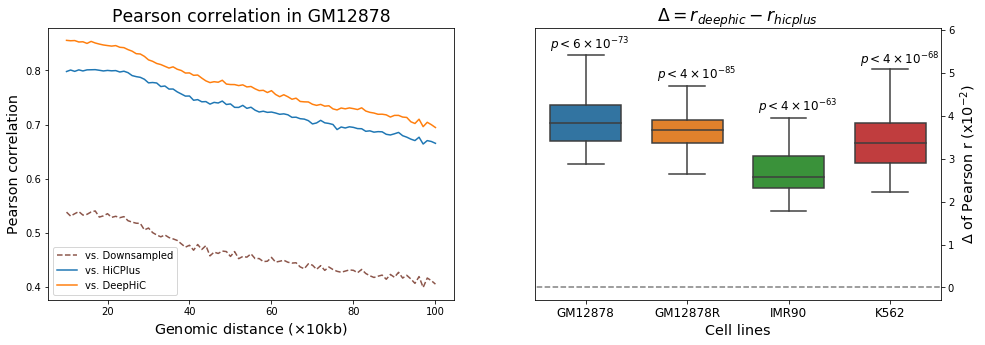

In [55]:
fig = plt.figure(figsize = [16, 5])
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(lower, upper), gm12878_data[lower:upper, 1], label='vs. Downsampled', color='C5', linestyle='--')
ax.plot(range(lower, upper), gm12878_data[lower:upper, 2], label='vs. HiCPlus', color='C0')
ax.plot(range(lower, upper), gm12878_data[lower:upper, 3], label='vs. DeepHiC', color='C1')
ax.set_title('Pearson correlation in GM12878', fontsize='xx-large')
ax.set_xlabel(r'Genomic distance ($\times$10kb)', fontsize='x-large')
ax.set_ylabel('Pearson correlation', fontsize='x-large')
ax.legend(loc='lower left')
ax = fig.add_subplot(1, 2, 2)
ax = sns.boxplot(x='label', y='delta', data=pd_data, ax=ax, width=0.7, fliersize=0)
ax.set_xticklabels(['GM12878', 'GM12878R', 'IMR90', 'K562'], fontsize='large')

ax.annotate(r'$p<6\times10^{-73}$', xy=(-0.35,5.55), fontsize='large')
ax.annotate(r'$p<4\times10^{-85}$', xy=(0.7,4.85), fontsize='large')
ax.annotate(r'$p<4\times10^{-63}$', xy=(1.7,4.1), fontsize='large')
ax.annotate(r'$p<4\times10^{-68}$', xy=(2.7,5.2), fontsize='large')

ax.plot(np.linspace(-0.95,3.95,num=10), np.zeros(10), color='gray', linestyle='--')
ax.set_title('$\Delta = r_{deephic} - r_{hicplus}$', fontsize='xx-large')
ax.set_xlabel('Cell lines', fontsize='x-large')
ax.set_ylabel('$\Delta$ of Pearson r (x$10^{-2}$)', fontsize='x-large')
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
svg_file = os.path.join(work_dir, f'fig2d_pearson.svg')
eps_file = os.path.join(work_dir, f'fig2d_pearson.eps')
fig.savefig(svg_file, format='svg')
fig.savefig(eps_file, format='eps')

In [33]:
from scipy.stats import ttest_rel

In [58]:
print(ttest_rel(gm12878_data[lower:upper, 3], gm12878_data[lower:upper, 2]))
print(ttest_rel(gm12878r_data[lower:upper, 3], gm12878r_data[lower:upper, 2]))
print(ttest_rel(k562_data[lower:upper, 3], k562_data[lower:upper, 2]))
print(ttest_rel(imr90_data[lower:upper, 3], imr90_data[lower:upper, 2]))

Ttest_relResult(statistic=57.78118093163391, pvalue=6.15953079698561e-73)
Ttest_relResult(statistic=79.37150503012843, pvalue=4.1735128137746045e-85)
Ttest_relResult(statistic=44.555268728979456, pvalue=4.041154200552875e-63)
Ttest_relResult(statistic=50.88563865129584, pvalue=4.078200697424752e-68)


#### Spearman

In [16]:
lower, upper = 10, 101
delta_gm12878  = gm12878_data[lower:upper, 6] - gm12878_data[lower:upper, 5]
delta_gm12878r = gm12878r_data[lower:upper, 6] - gm12878r_data[lower:upper, 5]
delta_imr90 = imr90_data[lower:upper, 6] - imr90_data[lower:upper, 5]
delta_k562  = k562_data[lower:upper, 6] - k562_data[lower:upper, 5]
delta = np.concatenate((delta_gm12878, delta_gm12878r, delta_imr90, delta_k562)) * 100
label = ['GM12878'] * (upper-lower) + ['GM12878R'] * (upper-lower) + ['IMR90'] * (upper-lower) + ['K562'] * (upper-lower)

In [17]:
pd_data_sp = pd.DataFrame({'delta': delta, 'label': label})

In [59]:
print(ttest_rel(gm12878_data[lower:upper, 6], gm12878_data[lower:upper, 5]))
print(ttest_rel(gm12878r_data[lower:upper, 6], gm12878r_data[lower:upper, 5]))
print(ttest_rel(k562_data[lower:upper, 6], k562_data[lower:upper, 5]))
print(ttest_rel(imr90_data[lower:upper, 6], imr90_data[lower:upper, 5]))

Ttest_relResult(statistic=111.26623660414005, pvalue=3.5628590902124967e-98)
Ttest_relResult(statistic=70.72353498155049, pvalue=1.145597876916059e-80)
Ttest_relResult(statistic=55.10684273245129, pvalue=3.903437739811384e-71)
Ttest_relResult(statistic=73.3203099784982, pvalue=4.7140144243627375e-82)


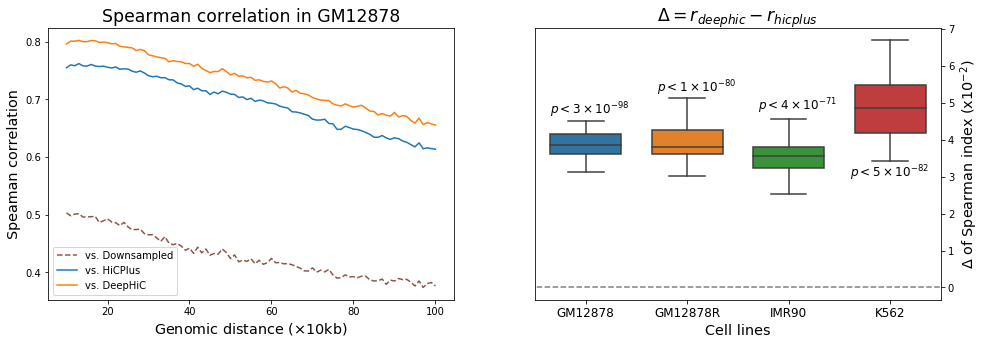

In [62]:
fig = plt.figure(figsize = [16, 5])
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(lower, upper), gm12878_data[lower:upper, 4], label='vs. Downsampled', color='C5', linestyle='--')
ax.plot(range(lower, upper), gm12878_data[lower:upper, 5], label='vs. HiCPlus', color='C0')
ax.plot(range(lower, upper), gm12878_data[lower:upper, 6], label='vs. DeepHiC', color='C1')
ax.set_title('Spearman correlation in GM12878', fontsize='xx-large')
ax.set_xlabel(r'Genomic distance ($\times$10kb)', fontsize='x-large')
ax.set_ylabel('Speaman correlation', fontsize='x-large')
ax.legend(loc='lower left')
ax = fig.add_subplot(1, 2, 2)
ax = sns.boxplot(x='label', y='delta', data=pd_data_sp, ax=ax, width=0.7, fliersize=0)
ax.set_xticklabels(['GM12878', 'GM12878R', 'IMR90', 'K562'], fontsize='large')

ax.annotate(r'$p<3\times10^{-98}$', xy=(-0.35,4.7), fontsize='large')
ax.annotate(r'$p<1\times10^{-80}$', xy=(0.7,5.3), fontsize='large')
ax.annotate(r'$p<4\times10^{-71}$', xy=(1.7,4.8), fontsize='large')
ax.annotate(r'$p<5\times10^{-82}$', xy=(2.6,3), fontsize='large')

ax.plot(np.linspace(-0.95,3.95,num=10), np.zeros(10), color='gray', linestyle='--')
ax.set_title('$\Delta = r_{deephic} - r_{hicplus}$', fontsize='xx-large')
ax.set_xlabel('Cell lines', fontsize='x-large')
ax.set_ylabel('$\Delta$ of Spearman index (x$10^{-2}$)', fontsize='x-large')
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
svg_file = os.path.join(work_dir, f'supp_fig_spearman.svg')
eps_file = os.path.join(work_dir, f'supp_fig_spearman.eps')
fig.savefig(svg_file, format='svg')
fig.savefig(eps_file, format='eps')

### Fig.2A

In [19]:
data = np.load('/data/RaoHiC/predict/GM12878/predict_chr16_40kb.npz')

orighic = data['hic']
downhic = data['downhic']
plushic = data['hicplus']
deephic = data['deephic']

orighic = orighic / np.max(orighic)
downhic = downhic / np.max(downhic)
plushic = plushic / np.max(plushic)

hic_16     = orighic[5700:5800, 5700:5800]
downhic_16 = downhic[5700:5800, 5700:5800]
plushic_16 = plushic[5700:5800, 5700:5800]
deephic_16 = deephic[5700:5800, 5700:5800]

In [20]:
data = np.load('/data/RaoHiC/predict/GM12878/predict_chr17_40kb.npz')

orighic = data['hic']
downhic = data['downhic']
plushic = data['hicplus']
deephic = data['deephic']

orighic = orighic / np.max(orighic)
downhic = downhic / np.max(downhic)
plushic = plushic / np.max(plushic)

hic_17     = orighic[7350:7450, 7350:7450]
downhic_17 = downhic[7350:7450, 7350:7450]
plushic_17 = plushic[7350:7450, 7350:7450]
deephic_17 = deephic[7350:7450, 7350:7450]

In [21]:
data = np.load('/data/RaoHiC/predict/GM12878/predict_chr22_40kb.npz')

orighic = data['hic']
downhic = data['downhic']
plushic = data['hicplus']
deephic = data['deephic']

orighic = orighic / np.max(orighic)
downhic = downhic / np.max(downhic)
plushic = plushic / np.max(plushic)

hic_22     = orighic[2300:2400, 2300:2400]
downhic_22 = downhic[2300:2400, 2300:2400]
plushic_22 = plushic[2300:2400, 2300:2400]
deephic_22 = deephic[2300:2400, 2300:2400]

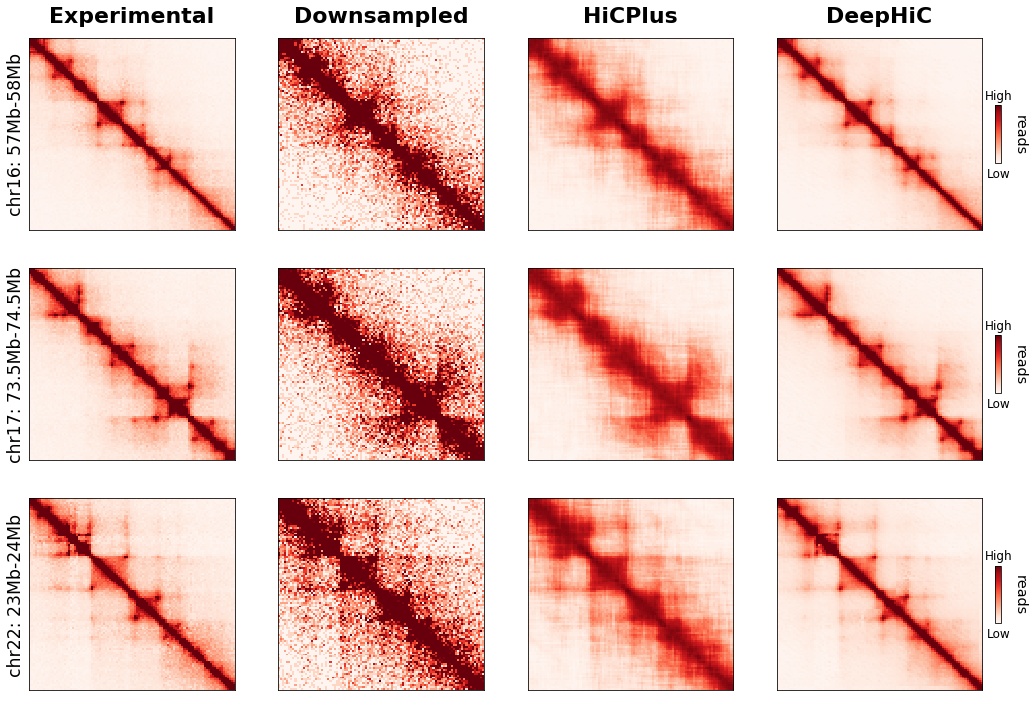

In [22]:
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=[18, 12], gridspec_kw = {'width_ratios':[1, 1, 1, 1.25]})

heatmap(axs[0,0], hic_16, show_bar=False, close_ticks=True)
axs[0,0].set_title('Experimental', fontsize='22', fontweight='semibold')
axs[0,0].set_ylabel('chr16: 57Mb-58Mb', fontsize='xx-large')
heatmap(axs[0,1], downhic_16, show_bar=False, close_ticks=True)
axs[0,1].set_title('Downsampled', fontsize='22', fontweight='semibold')
heatmap(axs[0,2], plushic_16, show_bar=False, close_ticks=True)
axs[0,2].set_title('HiCPlus', fontsize='22', fontweight='semibold')
heatmap(axs[0,3], deephic_16, close_ticks=True)
axs[0,3].set_title('DeepHiC', fontsize='22', fontweight='semibold')

heatmap(axs[1,0], hic_17, show_bar=False, close_ticks=True)
axs[1,0].set_ylabel('chr17: 73.5Mb-74.5Mb', fontsize='xx-large')
heatmap(axs[1,1], downhic_17, show_bar=False, close_ticks=True)
heatmap(axs[1,2], plushic_17, show_bar=False, close_ticks=True)
heatmap(axs[1,3], deephic_17, close_ticks=True)

heatmap(axs[2,0], hic_22, show_bar=False, close_ticks=True)
axs[2,0].set_ylabel('chr22: 23Mb-24Mb', fontsize='xx-large')
heatmap(axs[2,1], downhic_22, show_bar=False, close_ticks=True)
heatmap(axs[2,2], plushic_22, show_bar=False, close_ticks=True)
heatmap(axs[2,3], deephic_22, close_ticks=True)

svg_file = os.path.join(work_dir, f'fig2a_heatmap.svg')
eps_file = os.path.join(work_dir, f'fig2a_heatmap.eps')
fig.savefig(svg_file, format='svg')
fig.savefig(eps_file, format='eps')

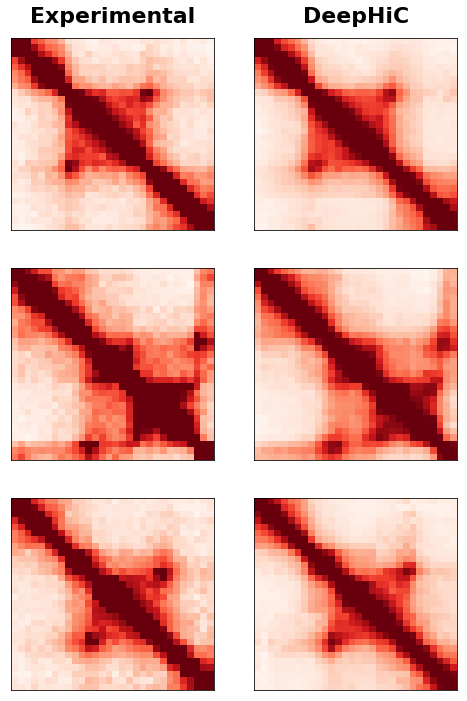

In [23]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=[8, 12])
# fig.tight_layout()

heatmap(axs[0,0], hic_16[25:55,25:55], show_bar=False, close_ticks=True)
axs[0,0].set_title('Experimental', fontsize='22', fontweight='semibold')
heatmap(axs[0,1], deephic_16[25:55,25:55], show_bar=False, close_ticks=True)
axs[0,1].set_title('DeepHiC', fontsize='22', fontweight='semibold')

heatmap(axs[1,0], hic_17[50:80,50:80], show_bar=False, close_ticks=True)
heatmap(axs[1,1], deephic_17[50:80,50:80], show_bar=False, close_ticks=True)

heatmap(axs[2,0], hic_22[40:70,40:70], show_bar=False, close_ticks=True)
heatmap(axs[2,1], deephic_22[40:70,40:70], show_bar=False, close_ticks=True)

svg_file = os.path.join(work_dir, f'fig2b_heatmap.svg')
eps_file = os.path.join(work_dir, f'fig2b_heatmap.eps')
fig.savefig(svg_file, format='svg')
fig.savefig(eps_file, format='eps')

In [24]:
from utils.ssim import ssim

In [26]:
print('Down', ssim(hic_16, downhic_16).item())
print('Down', ssim(hic_16, plushic_16).item())
print('Down', ssim(hic_16, deephic_16).item())

Down 0.19004453718662262
Down 0.6818268299102783
Down 0.9025614261627197


In [27]:
print('Down', ssim(hic_17, downhic_17).item())
print('Down', ssim(hic_17, plushic_17).item())
print('Down', ssim(hic_17, deephic_17).item())

Down 0.2022881954908371
Down 0.6523187756538391
Down 0.8891345858573914


In [28]:
print('Down', ssim(hic_22, downhic_22).item())
print('Down', ssim(hic_22, plushic_22).item())
print('Down', ssim(hic_22, deephic_22).item())

Down 0.2064235359430313
Down 0.5971259474754333
Down 0.8415825366973877


In [29]:
from math import log10

In [30]:
print('psnr_down', 10 * log10(1/((hic_16 - downhic_16) ** 2).mean()))
print('psnr_plus', 10 * log10(1/((hic_16 - plushic_16) ** 2).mean()))
print('psnr_deep', 10 * log10(1/((hic_16 - deephic_16) ** 2).mean()))

psnr_down 11.152605392149141
psnr_plus 17.980890820584694
psnr_deep 31.22115711029037


In [31]:
print('psnr_down', 10 * log10(1/((hic_17 - downhic_17) ** 2).mean()))
print('psnr_plus', 10 * log10(1/((hic_17 - plushic_17) ** 2).mean()))
print('psnr_deep', 10 * log10(1/((hic_17 - deephic_17) ** 2).mean()))

psnr_down 10.689778636693088
psnr_plus 16.81586194272954
psnr_deep 30.10213229728542


In [32]:
print('psnr_down', 10 * log10(1/((hic_22 - downhic_22) ** 2).mean()))
print('psnr_plus', 10 * log10(1/((hic_22 - plushic_22) ** 2).mean()))
print('psnr_deep', 10 * log10(1/((hic_22 - deephic_22) ** 2).mean()))

psnr_down 10.350973111401519
psnr_plus 16.285406413668177
psnr_deep 27.691502783492524


## Supplementary Figures

In [34]:
# range down_prm plus_prm srga_prm down_srm plus_srm srga_srm
gm12878_data = np.loadtxt('/data/RaoHiC/results/GM12878/50kb/visual/correlation/data/allchr_mean_result.csv')

### 50kb

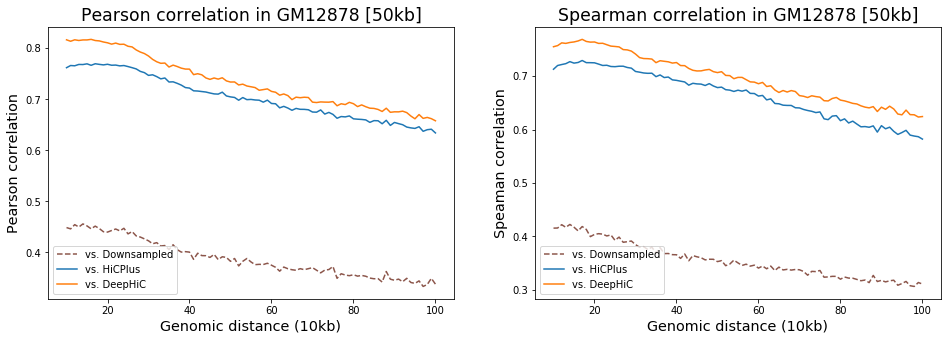

In [35]:
lower, upper = 10, 101
fig = plt.figure(figsize = [16, 5])
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(lower, upper), gm12878_data[lower:upper, 1], label='vs. Downsampled', color='C5', linestyle='--')
ax.plot(range(lower, upper), gm12878_data[lower:upper, 2], label='vs. HiCPlus', color='C0')
ax.plot(range(lower, upper), gm12878_data[lower:upper, 3], label='vs. DeepHiC', color='C1')
ax.set_title('Pearson correlation in GM12878 [50kb]', fontsize='xx-large')
ax.set_xlabel('Genomic distance (10kb)', fontsize='x-large')
ax.set_ylabel('Pearson correlation', fontsize='x-large')
ax.legend(loc='lower left')
ax = fig.add_subplot(1, 2, 2)
ax.plot(range(lower, upper), gm12878_data[lower:upper, 4], label='vs. Downsampled', color='C5', linestyle='--')
ax.plot(range(lower, upper), gm12878_data[lower:upper, 5], label='vs. HiCPlus', color='C0')
ax.plot(range(lower, upper), gm12878_data[lower:upper, 6], label='vs. DeepHiC', color='C1')
ax.set_title('Spearman correlation in GM12878 [50kb]', fontsize='xx-large')
ax.set_xlabel('Genomic distance (10kb)', fontsize='x-large')
ax.set_ylabel('Speaman correlation', fontsize='x-large')
ax.legend(loc='lower left')
svg_file = os.path.join(work_dir, f'supp_fig_50kb.svg')
eps_file = os.path.join(work_dir, f'supp_fig_50kb.eps')
fig.savefig(svg_file, format='svg')
fig.savefig(eps_file, format='eps')

In [36]:
# range down_prm plus_prm srga_prm down_srm plus_srm srga_srm
gm12878_data = np.loadtxt('/data/RaoHiC/results/GM12878/60kb/visual/correlation/data/allchr_mean_result.csv')

### 60kb

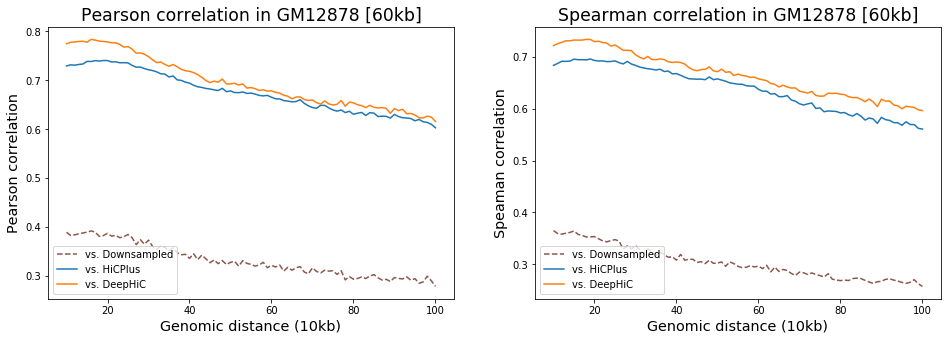

In [37]:
lower, upper = 10, 101
fig = plt.figure(figsize = [16, 5])
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(lower, upper), gm12878_data[lower:upper, 1], label='vs. Downsampled', color='C5', linestyle='--')
ax.plot(range(lower, upper), gm12878_data[lower:upper, 2], label='vs. HiCPlus', color='C0')
ax.plot(range(lower, upper), gm12878_data[lower:upper, 3], label='vs. DeepHiC', color='C1')
ax.set_title('Pearson correlation in GM12878 [60kb]', fontsize='xx-large')
ax.set_xlabel('Genomic distance (10kb)', fontsize='x-large')
ax.set_ylabel('Pearson correlation', fontsize='x-large')
ax.legend(loc='lower left')
ax = fig.add_subplot(1, 2, 2)
ax.plot(range(lower, upper), gm12878_data[lower:upper, 4], label='vs. Downsampled', color='C5', linestyle='--')
ax.plot(range(lower, upper), gm12878_data[lower:upper, 5], label='vs. HiCPlus', color='C0')
ax.plot(range(lower, upper), gm12878_data[lower:upper, 6], label='vs. DeepHiC', color='C1')
ax.set_title('Spearman correlation in GM12878 [60kb]', fontsize='xx-large')
ax.set_xlabel('Genomic distance (10kb)', fontsize='x-large')
ax.set_ylabel('Speaman correlation', fontsize='x-large')
ax.legend(loc='lower left')
svg_file = os.path.join(work_dir, f'supp_fig_60kb.svg')
eps_file = os.path.join(work_dir, f'supp_fig_60kb.eps')
fig.savefig(svg_file, format='svg')
fig.savefig(eps_file, format='eps')

### Supplementary Fig.2A

In [4]:
data = np.load('/data/RaoHiC/predict/K562/predict_chr7_40kb.npz')

orighic = data['hic']
downhic = data['downhic']
plushic = data['hicplus']
deephic = data['deephic']

orighic = orighic / np.max(orighic)
downhic = downhic / np.max(downhic)
plushic = plushic / np.max(plushic)

hic_10     = orighic[7300:7400, 7300:7400]
downhic_10 = downhic[7300:7400, 7300:7400]
plushic_10 = plushic[7300:7400, 7300:7400]
deephic_10 = deephic[7300:7400, 7300:7400]

In [5]:
data = np.load('/data/RaoHiC/predict/K562/predict_chr17_40kb.npz')

orighic = data['hic']
downhic = data['downhic']
plushic = data['hicplus']
deephic = data['deephic']

orighic = orighic / np.max(orighic)
downhic = downhic / np.max(downhic)
plushic = plushic / np.max(plushic)

hic_17     = orighic[4150:4250, 4150:4250]
downhic_17 = downhic[4150:4250, 4150:4250]
plushic_17 = plushic[4150:4250, 4150:4250]
deephic_17 = deephic[4150:4250, 4150:4250]

In [6]:
data = np.load('/data/RaoHiC/predict/K562/predict_chr22_40kb.npz')

orighic = data['hic']
downhic = data['downhic']
plushic = data['hicplus']
deephic = data['deephic']

orighic = orighic / np.max(orighic)
downhic = downhic / np.max(downhic)
plushic = plushic / np.max(plushic)

hic_22     = orighic[2300:2400, 2300:2400]
downhic_22 = downhic[2300:2400, 2300:2400]
plushic_22 = plushic[2300:2400, 2300:2400]
deephic_22 = deephic[2300:2400, 2300:2400]

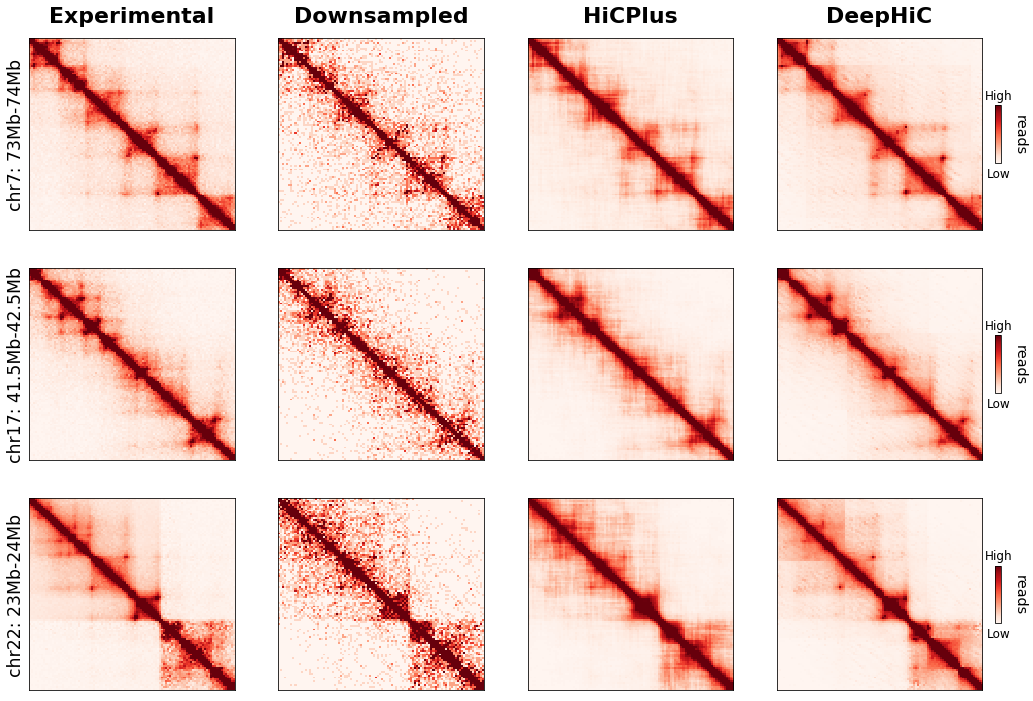

In [13]:
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=[18, 12], gridspec_kw = {'width_ratios':[1, 1, 1, 1.25]})

heatmap(axs[0,0], np.minimum(np.percentile(hic_10, 95), hic_10), show_bar=False, close_ticks=True)
axs[0,0].set_title('Experimental', fontsize='22', fontweight='semibold')
axs[0,0].set_ylabel('chr7: 73Mb-74Mb', fontsize='xx-large')
heatmap(axs[0,1], downhic_10, show_bar=False, close_ticks=True)
axs[0,1].set_title('Downsampled', fontsize='22', fontweight='semibold')
heatmap(axs[0,2], np.minimum(np.percentile(plushic_10, 95), plushic_10), show_bar=False, close_ticks=True)
axs[0,2].set_title('HiCPlus', fontsize='22', fontweight='semibold')
heatmap(axs[0,3], np.minimum(np.percentile(deephic_10, 95), deephic_10), close_ticks=True)
axs[0,3].set_title('DeepHiC', fontsize='22', fontweight='semibold')

heatmap(axs[1,0], np.minimum(np.percentile(hic_17, 95), hic_17), show_bar=False, close_ticks=True)
axs[1,0].set_ylabel('chr17: 41.5Mb-42.5Mb', fontsize='xx-large')
heatmap(axs[1,1], downhic_17, show_bar=False, close_ticks=True)
heatmap(axs[1,2], np.minimum(np.percentile(plushic_17, 95), plushic_17), show_bar=False, close_ticks=True)
heatmap(axs[1,3], np.minimum(np.percentile(deephic_17, 95), deephic_17), close_ticks=True)

heatmap(axs[2,0], np.minimum(np.percentile(hic_22, 95), hic_22), show_bar=False, close_ticks=True)
axs[2,0].set_ylabel('chr22: 23Mb-24Mb', fontsize='xx-large')
heatmap(axs[2,1], downhic_22, show_bar=False, close_ticks=True)
heatmap(axs[2,2], np.minimum(np.percentile(plushic_22, 95), plushic_22), show_bar=False, close_ticks=True)
heatmap(axs[2,3], np.minimum(np.percentile(deephic_22, 95), deephic_22), close_ticks=True)

svg_file = os.path.join(work_dir, f'supp_fig_heatmap_k562.svg')
eps_file = os.path.join(work_dir, f'supp_fig_heatmap_k562.eps')
fig.savefig(svg_file, format='svg')
fig.savefig(eps_file, format='eps')

### Supplementary Fig.2A in IMR90

In [20]:
data = np.load('/data/RaoHiC/predict/IMR90/predict_chr11_40kb.npz')

orighic = data['hic']
downhic = data['downhic']
plushic = data['hicplus']
deephic = data['deephic']

orighic = orighic / np.max(orighic)
downhic = downhic / np.max(downhic)
plushic = plushic / np.max(plushic)

hic_10     = orighic[3300:3400, 3300:3400]
downhic_10 = downhic[3300:3400, 3300:3400]
plushic_10 = plushic[3300:3400, 3300:3400]
deephic_10 = deephic[3300:3400, 3300:3400]

In [15]:
data = np.load('/data/RaoHiC/predict/IMR90/predict_chr17_40kb.npz')

orighic = data['hic']
downhic = data['downhic']
plushic = data['hicplus']
deephic = data['deephic']

orighic = orighic / np.max(orighic)
downhic = downhic / np.max(downhic)
plushic = plushic / np.max(plushic)

hic_17     = orighic[4150:4250, 4150:4250]
downhic_17 = downhic[4150:4250, 4150:4250]
plushic_17 = plushic[4150:4250, 4150:4250]
deephic_17 = deephic[4150:4250, 4150:4250]

In [16]:
data = np.load('/data/RaoHiC/predict/IMR90/predict_chr22_40kb.npz')

orighic = data['hic']
downhic = data['downhic']
plushic = data['hicplus']
deephic = data['deephic']

orighic = orighic / np.max(orighic)
downhic = downhic / np.max(downhic)
plushic = plushic / np.max(plushic)

hic_22     = orighic[2300:2400, 2300:2400]
downhic_22 = downhic[2300:2400, 2300:2400]
plushic_22 = plushic[2300:2400, 2300:2400]
deephic_22 = deephic[2300:2400, 2300:2400]

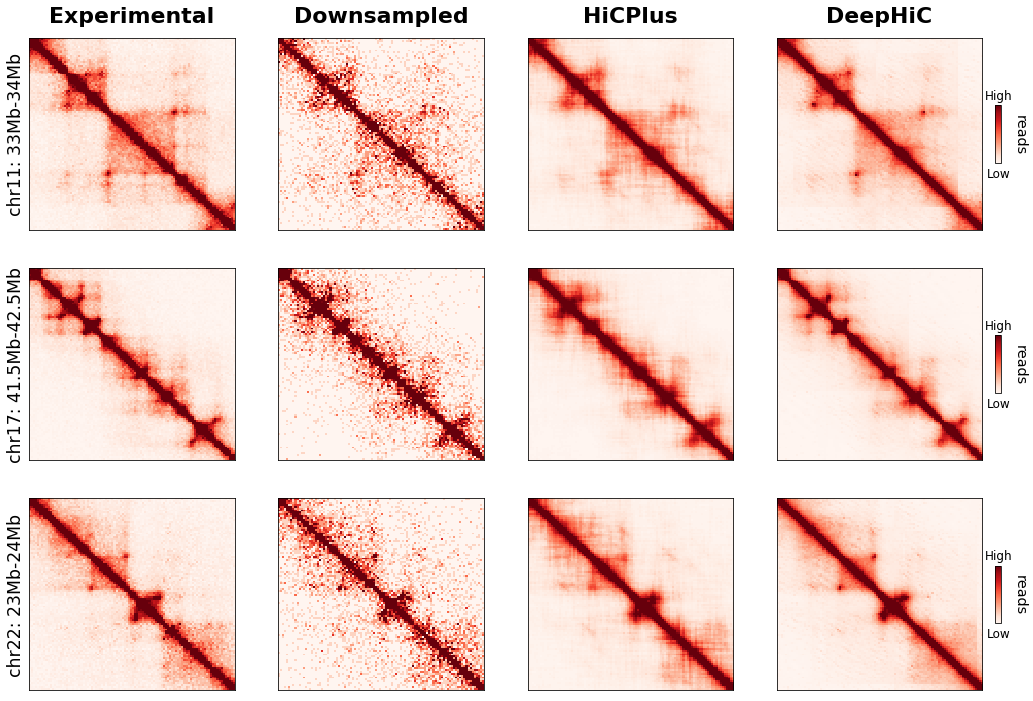

In [21]:
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=[18, 12], gridspec_kw = {'width_ratios':[1, 1, 1, 1.25]})

heatmap(axs[0,0], np.minimum(np.percentile(hic_10, 95), hic_10), show_bar=False, close_ticks=True)
axs[0,0].set_title('Experimental', fontsize='22', fontweight='semibold')
axs[0,0].set_ylabel('chr11: 33Mb-34Mb', fontsize='xx-large')
heatmap(axs[0,1], downhic_10, show_bar=False, close_ticks=True)
axs[0,1].set_title('Downsampled', fontsize='22', fontweight='semibold')
heatmap(axs[0,2], np.minimum(np.percentile(plushic_10, 95), plushic_10), show_bar=False, close_ticks=True)
axs[0,2].set_title('HiCPlus', fontsize='22', fontweight='semibold')
heatmap(axs[0,3], np.minimum(np.percentile(deephic_10, 95), deephic_10), close_ticks=True)
axs[0,3].set_title('DeepHiC', fontsize='22', fontweight='semibold')

heatmap(axs[1,0], np.minimum(np.percentile(hic_17, 95), hic_17), show_bar=False, close_ticks=True)
axs[1,0].set_ylabel('chr17: 41.5Mb-42.5Mb', fontsize='xx-large')
heatmap(axs[1,1], downhic_17, show_bar=False, close_ticks=True)
heatmap(axs[1,2], np.minimum(np.percentile(plushic_17, 95), plushic_17), show_bar=False, close_ticks=True)
heatmap(axs[1,3], np.minimum(np.percentile(deephic_17, 95), deephic_17), close_ticks=True)

heatmap(axs[2,0], np.minimum(np.percentile(hic_22, 97), hic_22), show_bar=False, close_ticks=True)
axs[2,0].set_ylabel('chr22: 23Mb-24Mb', fontsize='xx-large')
heatmap(axs[2,1], downhic_22, show_bar=False, close_ticks=True)
heatmap(axs[2,2], np.minimum(np.percentile(plushic_22, 97), plushic_22), show_bar=False, close_ticks=True)
heatmap(axs[2,3], np.minimum(np.percentile(deephic_22, 97), deephic_22), close_ticks=True)

svg_file = os.path.join(work_dir, f'supp_fig_heatmap_imr90.svg')
eps_file = os.path.join(work_dir, f'supp_fig_heatmap_imr90.eps')
fig.savefig(svg_file, format='svg')
fig.savefig(eps_file, format='eps')

### Heatmap For mouse Hi-C

In [11]:
data = np.load('/data/MouseHiC/predict/8cell/predict_chr16_40kb.npz')

orighic = data['hic']
deephic = data['deephic']

orighic = orighic / np.max(orighic)

orighic_8cell = orighic[1000:1100, 1000:1100]
deephic_8cell = deephic[1000:1100, 1000:1100]

In [18]:
data = np.load('/data/MouseHiC/predict/icm/predict_chr7_40kb.npz')

orighic = data['hic']
deephic = data['deephic']

orighic = orighic / np.max(orighic)

orighic_icm = orighic[8750:8850, 8750:8850]
deephic_icm = deephic[8750:8850, 8750:8850]

In [20]:
data = np.load('/data/MouseHiC/predict/mesc/predict_chr15_40kb.npz')

orighic = data['hic']
deephic = data['deephic']

orighic = orighic / np.max(orighic)

orighic_mesc = orighic[2500:2600, 2500:2600]
deephic_mesc = deephic[2500:2600, 2500:2600]

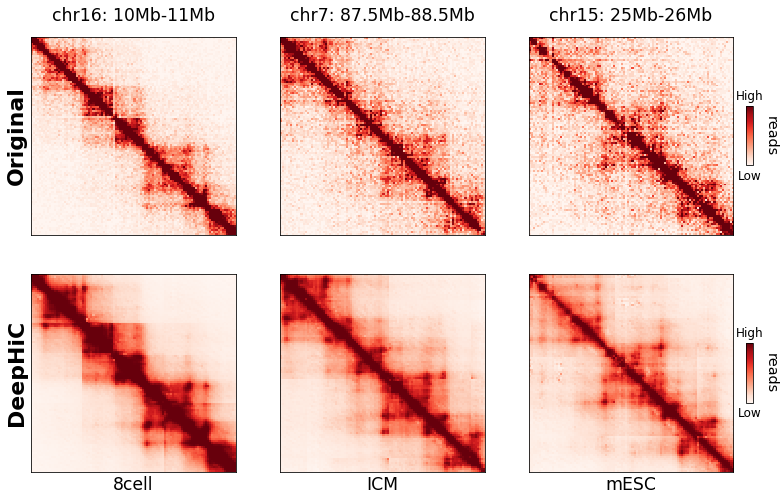

In [22]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=[13.5, 8], gridspec_kw = {'width_ratios':[1, 1, 1.25]})

# heatmap(axs[0,0], dediag(orighic_17), show_bar=False, close_ticks=True)
heatmap(axs[0,0], np.minimum(np.percentile(orighic_8cell,95), orighic_8cell), show_bar=False, close_ticks=True)
axs[0,0].set_ylabel('Original', fontsize='22', fontweight='semibold')
axs[0,0].set_title('chr16: 10Mb-11Mb', fontsize='xx-large')
heatmap(axs[1,0], deephic_8cell, show_bar=False, close_ticks=True)
axs[1,0].set_ylabel('DeepHiC', fontsize='22', fontweight='semibold')
axs[1,0].set_xlabel('8cell', fontsize='xx-large')

heatmap(axs[0,1], np.minimum(np.percentile(orighic_icm,95), orighic_icm), show_bar=False, close_ticks=True)
axs[0,1].set_title('chr7: 87.5Mb-88.5Mb', fontsize='xx-large')
heatmap(axs[1,1], deephic_icm, show_bar=False, close_ticks=True)
axs[1,1].set_xlabel('ICM', fontsize='xx-large')

heatmap(axs[0,2], np.minimum(np.percentile(orighic_mesc,95), orighic_mesc), show_bar=True, close_ticks=True)
axs[0,2].set_title('chr15: 25Mb-26Mb', fontsize='xx-large')
heatmap(axs[1,2], deephic_mesc, show_bar=True, close_ticks=True)
axs[1,2].set_xlabel('mESC', fontsize='xx-large')


svg_file = os.path.join(work_dir, f'fig6a_heatmap_mouse.svg')
eps_file = os.path.join(work_dir, f'fig6a_heatmap_mouse.eps')
fig.savefig(svg_file, format='svg')
fig.savefig(eps_file, format='eps')